In [1]:
from trainTestValSplit import getTrainTestValSplit
from definitions import ROOT_DIR

In [2]:
train, test, val = getTrainTestValSplit(_dataset_path=f'{ROOT_DIR}/dataset/ExtraSensory/ExtraSensory.per_uuid_features_labels')

C:\Users\mike-\Documents\VU\ML4QS-Assignment3\venv\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [4]:
train.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1446679890,1.002594,0.007883,0.003915,0.014942,0.998561,1.001364,1.005313,1.588519,6.684581,...,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,2
1,1446679951,1.001775,0.004925,0.004835,0.007279,0.998532,1.000627,1.003914,2.127292,6.684600,...,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,2
2,1446680319,1.000820,0.005071,0.006390,0.008822,0.998098,0.999886,1.001989,1.912200,6.684599,...,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,2
3,1446680380,0.998604,0.003899,0.003218,0.006914,0.996412,0.998325,1.000464,1.721122,6.684604,...,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,2
4,1446680440,1.004441,0.006587,0.006456,0.009489,0.999717,1.003165,1.007644,2.214256,6.684590,...,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,2


In [6]:
for col in train.columns:
    print(col)

timestamp
raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:std
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:moment4
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:log_energy_band2
raw_acc:magnitude_spectrum:log_energy_band3
raw_acc:magnitude_spectrum:log_energy_band4
raw_acc:magnitude_spectrum:spectral_entropy
raw_acc:magnitude_autocorrelation:period
raw_acc:magnitude_autocorrelation:normalized_ac
raw_acc:3d:mean_x
raw_acc:3d:mean_y
raw_acc:3d:mean_z
raw_acc:3d:std_x
raw_acc:3d:std_y
raw_acc:3d:std_z
raw_acc:3d:ro_xy
raw_acc:3d:ro_xz
raw_acc:3d:ro_yz
proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:std
proc_gyro:magnitude_stats:moment3
proc_gyro:magnitude_stats:moment4
proc_gyro:magnitude_stats:percentile25
proc_g

In [37]:
# drop columns with more than 50% NA values
train2 = train.drop(train.filter(regex='label:').columns, axis=1) # Do not take label in account
drop_cols = (train2.isnull().sum() / train2.shape[0]) > 0.5 #Columns with more than 50% missing values
drop_cols = drop_cols[drop_cols == True].index
train = train.drop(columns=drop_cols)
del train2

<AxesSubplot:>

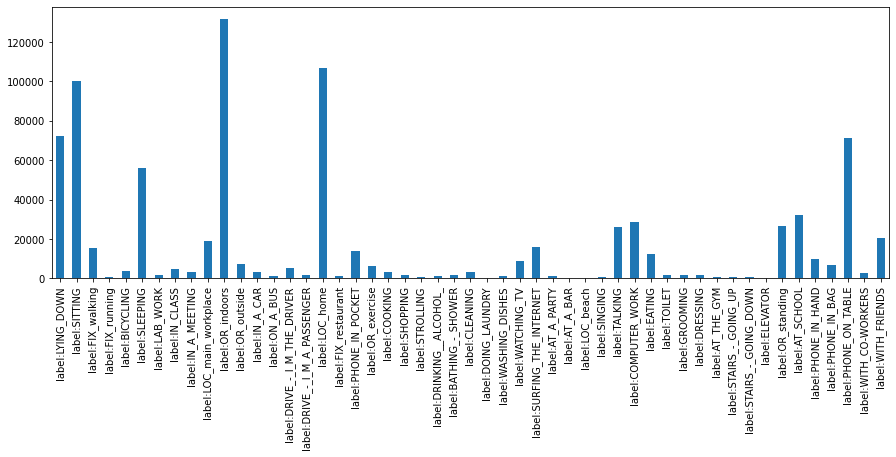

In [62]:
# What is the label distribution?
train.filter(regex='label:').sum().plot(kind='bar', figsize=(15,5))

(269578, 278)